## Demonstration of Regularized Multivariate Linear Regression

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates a regularized multivariate linear regression, the [ridge regression](https://en.wikipedia.org/wiki/Ridge_regression), which is used for [multicollinear](https://en.wikipedia.org/wiki/Multicollinearity) features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a simple two-dimensional linear relationship and additive noise. The features are then lifted into a higher dimensional feature space by a linear mapping. This leads to linear correlations between features.

In [2]:
N = 1000  # total number of examples
F = 6  # dimensionality of lifted feature space
alpha = 1.2  # true intercept
theta = [0.1, 0.25]  # true slopes

np.random.seed(123)
X = np.random.uniform(low=-5, high=10, size=(N, 2))
Y = alpha + np.dot(X, theta) + .5 * np.random.normal(size=(N))

# lifting of feature space by linear mapping
A = np.random.uniform(low=-2, high=2, size=(2, F))
A = A * np.random.choice([0, 1], size=(2, F), p=[2./10, 8./10])
XF = np.dot(X, A)

The condition number of the (unscaled) empirical covariance matrix $\mathbf{X}^T \mathbf{X}$ is used as a measure for the ill-conditioning of the normal equation. The results show that the condition number for the lifted feature space is indeed very high due to the multicollinear features.

In [3]:
kappa_x = np.linalg.cond(X.T @ X)
kappa_xf = np.linalg.cond(XF.T @ XF)

print('Condition number of covariance matrix of \n \t uncorrelated features: {}'.format(kappa_x))
print('\t correlated features: {}'.format(kappa_xf))

Condition number of covariance matrix of 
 	 uncorrelated features: 1.5900217803414807
	 correlated features: 3.2120397364170125e+17


### Estimate Parameters of Ridge Regression

Lets estimate the parameters of the linear mutivariate regression model using the ridge regression. First some helper functions are defined for estimating the regression coefficients, the prediction model and evaluation of the results.

In [4]:
def ridge_regression(Xt, Y, mu=0):
    return np.linalg.inv(Xt.T @ Xt + mu*np.eye(F+1)) @ Xt.T @ Y


def predict(Xt, theta_hat):
    return np.dot(Xt, theta_hat)


def evaluate(Y, Y_hat):
    e = Y - Y_hat
    std_e = np.std(e)

    TSS = np.sum((Y - np.mean(Y))**2)
    RSS = np.sum((Y-Y_hat)**2)
    Rs = 1 - RSS/TSS

    return std_e, Rs

First the ordinary least-squares approach is applied by setting the regularization parameter to $\mu = 0$. The results show that the estimates of the parameters show large errors, which is also reflected by the performance metrics.

In [5]:
Xt = np.concatenate((np.ones((len(XF), 1)), XF), axis=1)

theta_hat = ridge_regression(Xt, Y)
Y_hat = predict(Xt, theta_hat)
std_e, Rs = evaluate(Y, Y_hat)

print('Estimated/true intercept: \t\t {0:.3f} / {1:.3f}'.format(theta_hat[0], alpha))
print('Standard deviation of residual error: \t {0:.3f}'.format(std_e))
print('Coefficient of determination: \t\t {0:.3f}'.format(Rs))

Estimated/true intercept: 		 -19.743 / 1.200
Standard deviation of residual error: 	 7.800
Coefficient of determination: 		 -166.338


Now the ridge regression is used with $\mu = 0.001$. The results are much better now, however it is not clear if the regularization parameter has been chosen appropriately.

In [6]:
theta_hat = ridge_regression(Xt, Y, mu=1e-3)
Y_hat = predict(Xt, theta_hat)
std_e, Rs = evaluate(Y, Y_hat)

print('Estimated/true intercept: \t\t {0:.3f} / {1:.3f}'.format(theta_hat[0], alpha))
print('Standard deviation of residual error: \t {0:.3f}'.format(std_e))
print('Coefficient of determination: \t\t {0:.3f}'.format(Rs))

Estimated/true intercept: 		 1.201 / 1.200
Standard deviation of residual error: 	 0.492
Coefficient of determination: 		 0.853


### Hyperparameter Search

In order to optimize the regularization parameter $\mu$ for the given dataset, the ridge regression is evaluated for a series of potential regularization parameters. After a first coarse search, the search is refined in a second step. The results of this refined search are computed and plotted in the following. It can be concluded that $\mu = 3 \cdot 10^{-11}$ seems to be a good choice.

In [7]:
results = list()

for n in np.linspace(-12, -10, 100):
    mu = 10.0**n
    theta_hat = ridge_regression(Xt, Y, mu=mu)
    Y_hat = predict(Xt, theta_hat)
    std_e, Rs = evaluate(Y, Y_hat)
    results.append((mu, std_e, Rs))

results = np.array(results)

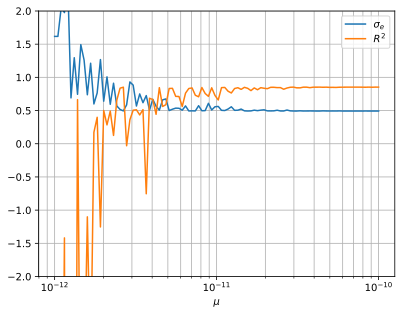

In [8]:
fig, ax = plt.subplots()

plt.plot(results[:, 0], results[:, 1], label=r'$\sigma_e$')
plt.plot(results[:, 0], results[:, 2], label=r'$R^2$')

ax.set_xscale('log')
plt.xlabel(r'$\mu$')

plt.ylim([-2, 2])
plt.legend()
plt.grid(True, which="both")

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.